# Script for studying the use of graphs in python:

In [16]:
import numpy as np
from random import uniform,randint
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
from scipy import signal
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
import networkx as nx
import math
#import jgraph as ig

In [17]:
from modules.distances import l1dist

In [40]:
## Sorting point masses into the 2D space:
xmin = -10.0
xmax = +10.0
ymin = -10.0
ymax = +10.0

npoints = 20
x = np.zeros(npoints)
y = np.zeros(npoints)
node = np.zeros(npoints)

In [41]:
for i in range(npoints):
    node[i] = i
    x[i] = uniform(xmin,xmax)
    y[i] = uniform(ymin,ymax)

In [42]:
# generation of matrix adjacent:
matrix = {'node':node, 'x':x, 'y':y}

In [43]:
matrix['x'][4]

9.519763469481461

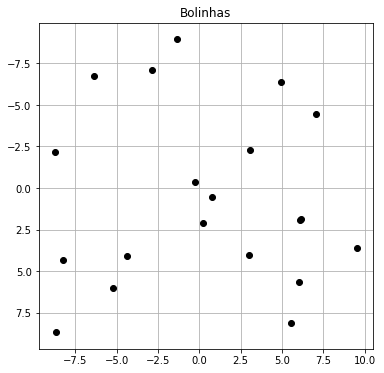

In [45]:
###--------##########################
plt.figure( figsize=(6,6) )
p1 = plt.plot(x, y, 'ok' )
plt.title('Bolinhas')
plt.grid()

plt.xlim( min(x)-1.0, max(x)+1.0 )
plt.ylim( min(y)-1.0, max(y)+1.0 )

plt.gca().invert_yaxis()

plt.show()

In [60]:
# Lets see what's going on here:
S = nx.Graph()
for i in range(npoints):
    S.add_node(i) #,pos=(x[i],y[i]) )
    for j in range(npoints):
        S.add_edge(i,j,weight=l1dist(x,y)[i][j])
TS = nx.minimum_spanning_tree(S)

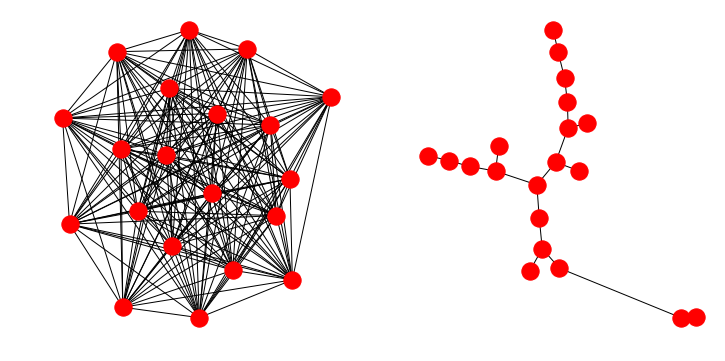

In [63]:
plt.figure(figsize=(12,6))
plt.subplot(121)
nx.draw(S)
plt.subplot(122)
nx.draw(TS)
plt.show()

In [65]:
TS[19]

{12: {'weight': 4.1185257462424509}, 5: {'weight': 6.5487560145790269}, 7: {'weight': 2.7116781896522628}}


# TODO: Entender as saidas do MST para podermos calcular a funcao de equidistancia para calcular a funcao $\theta$

># <center> $\theta = \sum_i (d_{mst}^i - \overline{d_{mst}})$